<a href="https://colab.research.google.com/github/GabrielCdev/clustering_iris/blob/main/Clustering_IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 03

1. Utilize dataset reduzido da Iris usando somente as largura e
comprimento de sépala.

2. Utilize a inercia para escolha da quantidade inicial de clusters;

3. Aplique o K means , DBSCAN e Fuzzy C means

4. Ao final, calcule a matriz de confusão, acurácia, precision , recall,
specificity , AUC ROC e AUC PRC sobre o dataset reduzido da Iris.

## Aluno

Gabriel Borges Calheiros

In [ ]:
# !pip install kneed
from kneed import KneeLocator

In [ ]:
# !pip install fuzzy-c-means
from fcmeans import FCM

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# Load Iris dataset
iris = load_iris()

In [ ]:
# Transformando em dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
# Reduzindo para comprimento e largura da sépala
reduced_iris = iris_df[['sepal width (cm)', 'sepal length (cm)']]
reduced_iris

,sepal width (cm),sepal length (cm)
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


# K-Means
Determinaremos o k ideal (número de clusters) usando a técnica de cotovelo e, em seguida, implementamos o algoritmo kmeans para o k ideal.

In [ ]:
# Algoritmo Kmeans
kmeans_set = {"init":"k-means++", "n_init":10, "max_iter":300, "random_state":1}

# Encontrando inercia para k cluster
inercia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(reduced_iris)
    inercia.append(kmeans.inertia_)

In [ ]:
def elbow_optimizer(inercia, name):
  kl = KneeLocator(range(1,11), inercia, curve='convex', direction="decreasing")
  sns.lineplot(x=range(1,11), y=inercia, linewidth=3)
  plt.xticks(range(1,11))
  plt.xlabel("Número de Clusters", labelpad=20)
  plt.ylabel("Inercia", labelpad=20)
  plt.title(f"Elbow Método para {name}", y=1.09)
  plt.axvline(x=kl.elbow, color= 'black', label='axvline-fullheight', ls='--', linewidth=3)
  plt.show()

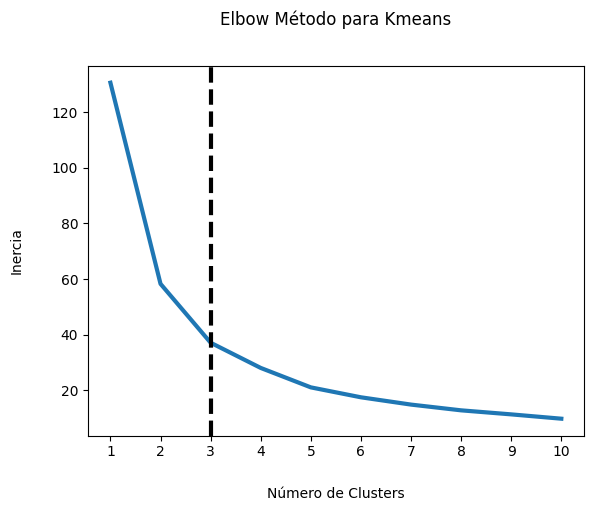

In [ ]:
elbow_optimizer(inercia, 'Kmeans')

Com base no método do cotovelo, o número ótimo de clusters para o algoritmo kmeans é igual a 3.

Avaliamos esse resultado com a ajuda de técnicas de validação interna, iremos usar o silhouette_score.

In [ ]:
silhouette_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(reduced_iris)
    score = silhouette_score(reduced_iris, kmeans.labels_)
    silhouette_coef.append(score)

In [ ]:
def plot_avaliacao(sh_score, name, x=range(2,11)):
  fig, ax = plt.subplots(figsize=(10,5), dpi=100)
  ax.plot(x, sh_score, marker='o', ms=9)
  ax.set_xlabel("Número de Clusters", labelpad=20)
  ax.set_ylabel("Silhouette Coeficiente", labelpad=20)
  plt.suptitle(f'Avaliando {name} Clustering',y=0.9)
  plt.tight_layout(pad=3)
  plt.show()

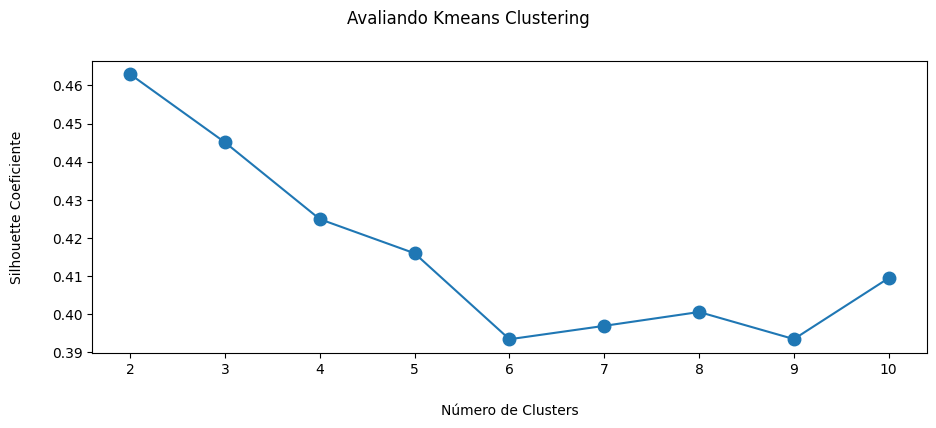

In [ ]:
plot_avaliacao(silhouette_coef, 'Kmeans')

De acordo com os resultados obtidos nos gráficos acima, ambos confirmam o número de 3 clusters como o k ideal.

Portanto, consideramos que o k ideal é 3 e novamente implementamos kmeans para n_clusters=3.

In [ ]:
def silhueta(X, y_km):
  # find cluster labels and number of clusters
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]

  # calculate silhouettes
  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

  # plot silhouette
  fig, ax = plt.subplots()
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax.barh(
          range(y_ax_lower, y_ax_upper),
          c_silhouette_vals,
          height=1.0, edgecolor='none',
          color=color
      )
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  # calculate silhouette score
  silhouette_avg = np.mean(silhouette_vals)

  ax.axvline(silhouette_avg, color="red", linestyle="--")
  ax.set_yticks(yticks, cluster_labels + 1)
  ax.set_ylabel('Cluster')
  ax.set_xlabel('Silhouette coefficient')
  ax.plot()

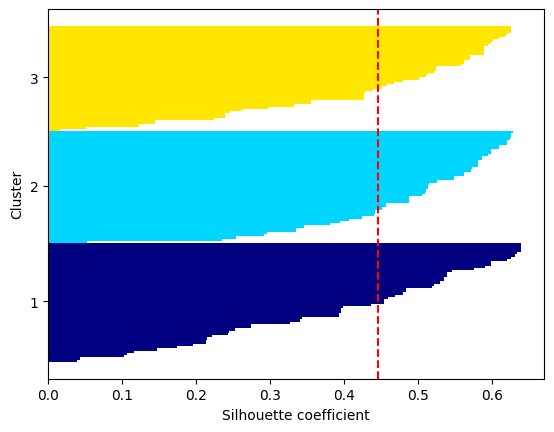

In [ ]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(reduced_iris)
silhueta(reduced_iris, y_km)

<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

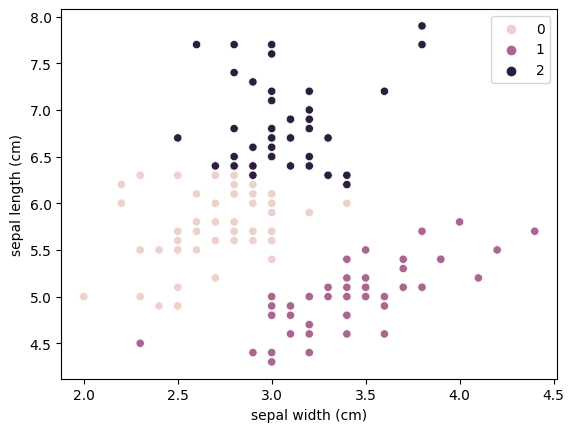

In [ ]:
# Visualizando a partição
sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', data=reduced_iris, hue=y_km)

# DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(reduced_iris)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([reduced_iris, y_pred_df],axis=1)

print(val)

     sepal width (cm)  sepal length (cm)  pred_label
0                 3.5                5.1           0
1                 3.0                4.9           0
2                 3.2                4.7           0
3                 3.1                4.6           0
4                 3.6                5.0           0
..                ...                ...         ...
145               3.0                6.7           0
146               2.5                6.3           0
147               3.0                6.5           0
148               3.4                6.2           0
149               3.0                5.9           0

[150 rows x 3 columns]


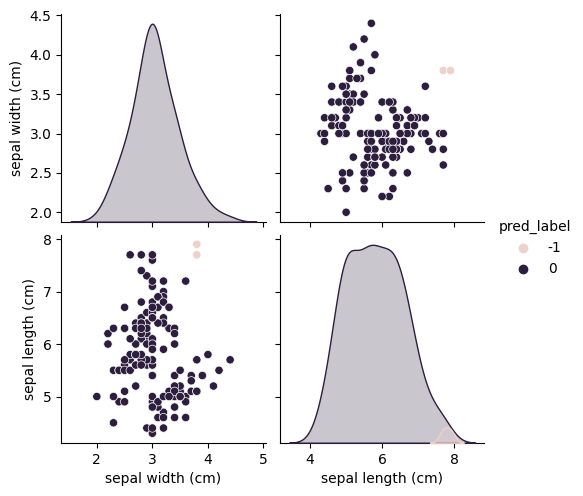

In [ ]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()

# Fuzzy C-Means

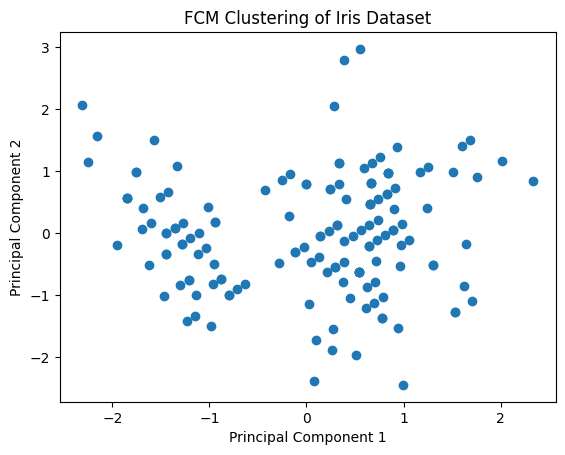

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(reduced_iris)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Cluster the data using FCM
fcm = FCM(n_clusters=3, m=2)
fcm.fit(X_std)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("FCM Clustering of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()